# Single Pixel Qinj Mapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import hist
from hist import Hist

## On-board VRef

### List all relevant files

In [37]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*testing_[0-9]*"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_0.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_4.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_5.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_7.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_6.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_1

### Analyze files line by line

In [69]:
hit_counts = np.zeros((16,16))
CAL_sum = np.zeros((16,16))
CAL_sum_sq = np.zeros((16,16))
TOA_sum = np.zeros((16,16))
TOA_sum_sq = np.zeros((16,16))
TOT_sum = np.zeros((16,16))
TOT_sum_sq = np.zeros((16,16))

total_files = len(file_list)
for file_index, file_name in enumerate(file_list):
    print(f"{file_index+1}/{total_files}")
    with open(file_name) as infile:
        for line in infile:
            text_list = line.split()
            if text_list[2]!="DATA": continue
            col = int(text_list[6])
            row = int(text_list[8])
            TOA = int(text_list[10])
            TOT = int(text_list[12])
            CAL = int(text_list[14])
            hit_counts[row, col] += 1 
            CAL_sum[row, col] += CAL
            CAL_sum_sq[row, col] += CAL*CAL
            TOA_sum[row, col] += TOA
            TOA_sum_sq[row, col] += TOA*TOA
            TOT_sum[row, col] += TOT
            TOT_sum_sq[row, col] += TOT*TOT

1/102
2/102
3/102
4/102
5/102
6/102
7/102
8/102
9/102
10/102
11/102
12/102
13/102
14/102
15/102
16/102
17/102
18/102
19/102
20/102
21/102
22/102
23/102
24/102
25/102
26/102
27/102
28/102
29/102
30/102
31/102
32/102
33/102
34/102
35/102
36/102
37/102
38/102
39/102
40/102
41/102
42/102
43/102
44/102
45/102
46/102
47/102
48/102
49/102
50/102
51/102
52/102
53/102
54/102
55/102
56/102
57/102
58/102
59/102
60/102
61/102
62/102
63/102
64/102
65/102
66/102
67/102
68/102
69/102
70/102
71/102
72/102
73/102
74/102
75/102
76/102
77/102
78/102
79/102
80/102
81/102
82/102
83/102
84/102
85/102
86/102
87/102
88/102
89/102
90/102
91/102
92/102
93/102
94/102
95/102
96/102
97/102
98/102
99/102
100/102
101/102
102/102


In [77]:
CAL_mean = CAL_sum/hit_counts
# CAL_std = np.sqrt(((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))/hit_counts)
CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
TOA_mean = TOA_sum/hit_counts
TOA_std = np.sqrt(((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2)))
TOT_mean = TOT_sum/hit_counts
TOT_std = np.sqrt(((TOT_sum_sq/hit_counts) - pow(TOT_mean, 2)))

/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:1: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:4: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt(((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2)))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:6: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:7: RuntimeWarning: invali

### Plot maps

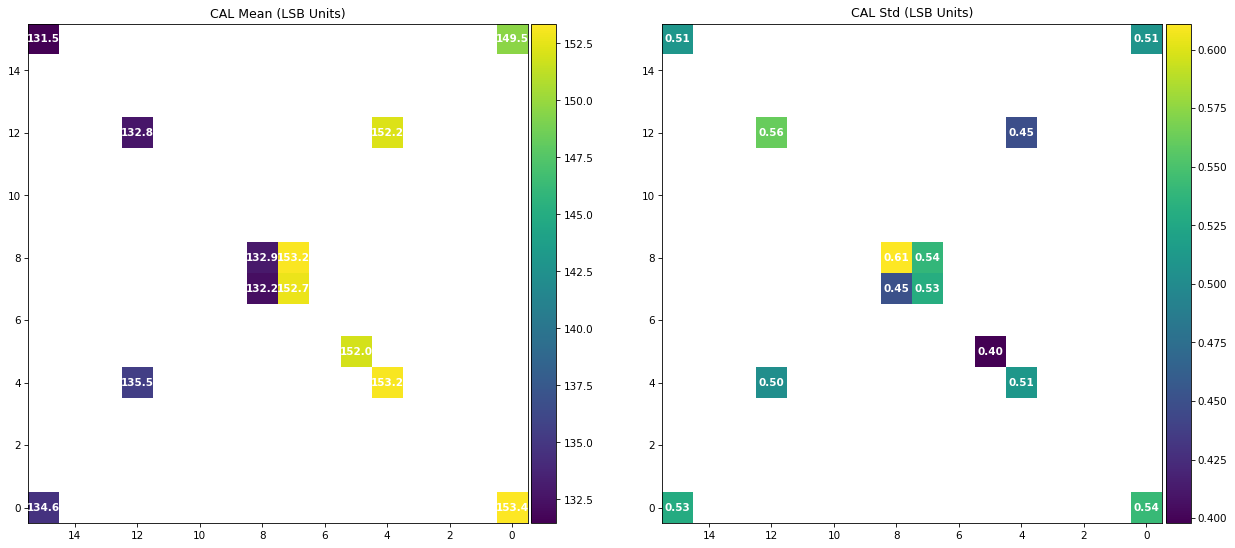

In [89]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("CAL Mean (LSB Units)")
img0 = ax0.imshow(CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("CAL Std (LSB Units)")
img1 = ax1.imshow(CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

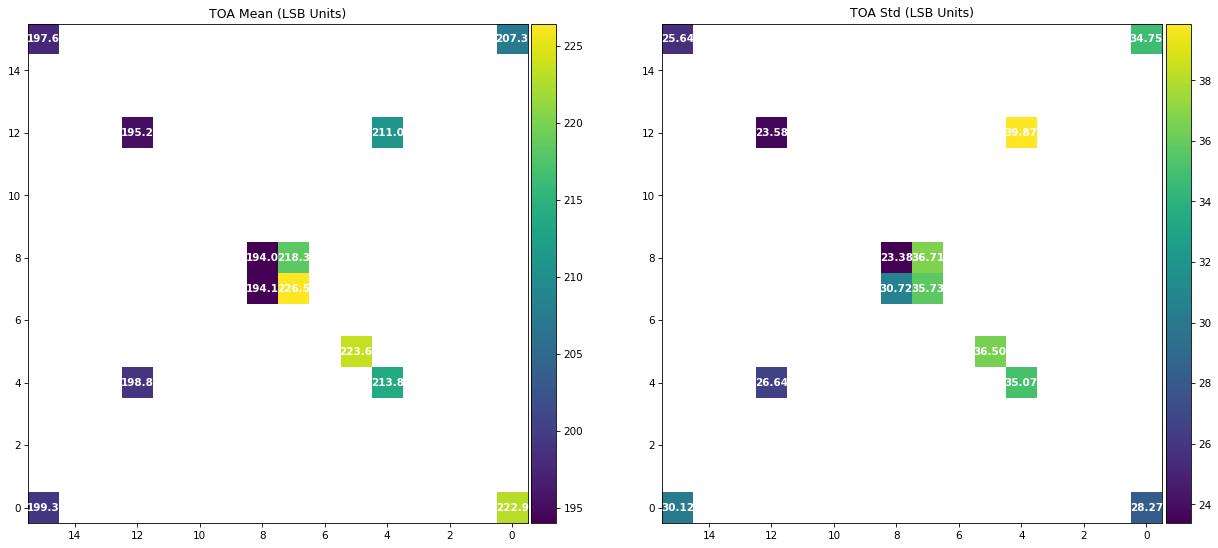

In [88]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOA Mean (LSB Units)")
img0 = ax0.imshow(TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOA Std (LSB Units)")
img1 = ax1.imshow(TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

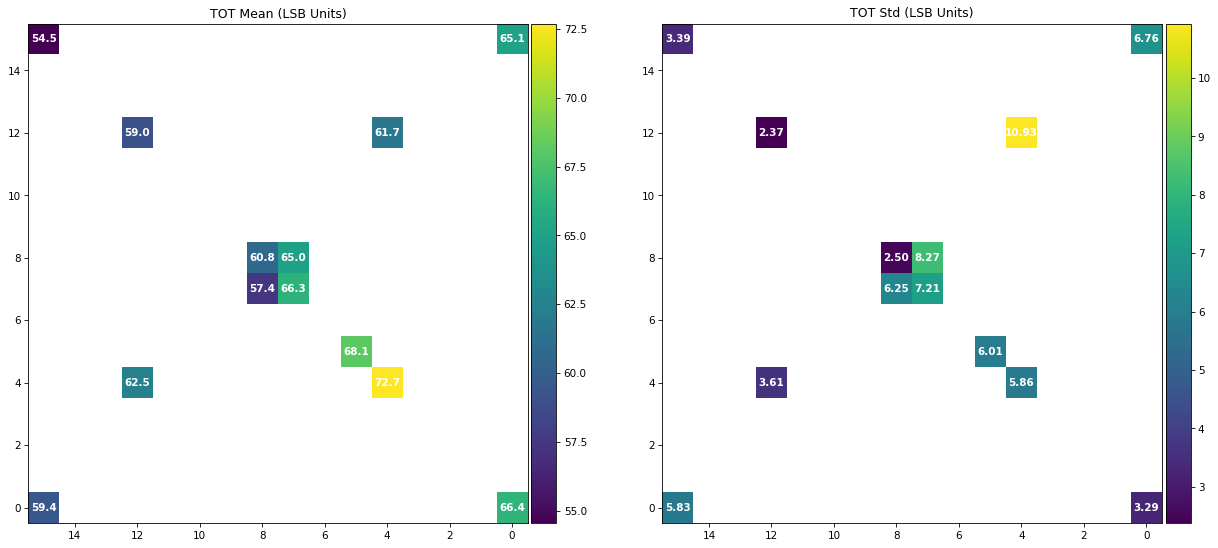

In [87]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOT Mean (LSB Units)")
img0 = ax0.imshow(TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOT Std (LSB Units)")
img1 = ax1.imshow(TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

## External VRef = 1 V

In [2]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*testing_VRef_[0-9]*"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_0.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_4.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_5.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_7_15/TDC_Data_translated_6.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_12_4/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_12_4/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_12_4/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_VRef_12_4/TDC_Data_translated_0.dat

### Accumulated statistics

In [236]:
hit_counts = np.zeros((16,16))
CAL_sum = np.zeros((16,16))
CAL_sum_sq = np.zeros((16,16))
TOA_sum = np.zeros((16,16))
TOA_sum_sq = np.zeros((16,16))
TOT_sum = np.zeros((16,16))
TOT_sum_sq = np.zeros((16,16))

total_files = len(file_list)
for file_index, file_name in enumerate(file_list):
    print(f"{file_index+1}/{total_files}")
    with open(file_name) as infile:
        for line in infile:
            text_list = line.split()
            if text_list[2]!="DATA": continue
            col = int(text_list[6])
            row = int(text_list[8])
            TOA = int(text_list[10])
            TOT = int(text_list[12])
            CAL = int(text_list[14])
            hit_counts[row, col] += 1 
            CAL_sum[row, col] += CAL
            CAL_sum_sq[row, col] += CAL*CAL
            TOA_sum[row, col] += TOA
            TOA_sum_sq[row, col] += TOA*TOA
            TOT_sum[row, col] += TOT
            TOT_sum_sq[row, col] += TOT*TOT

1/226
2/226
3/226
4/226
5/226
6/226
7/226
8/226
9/226
10/226
11/226
12/226
13/226
14/226
15/226
16/226
17/226
18/226
19/226
20/226
21/226
22/226
23/226
24/226
25/226
26/226
27/226
28/226
29/226
30/226
31/226
32/226
33/226
34/226
35/226
36/226
37/226
38/226
39/226
40/226
41/226
42/226
43/226
44/226
45/226
46/226
47/226
48/226
49/226
50/226
51/226
52/226
53/226
54/226
55/226
56/226
57/226
58/226
59/226
60/226
61/226
62/226
63/226
64/226
65/226
66/226
67/226
68/226
69/226
70/226
71/226
72/226
73/226
74/226
75/226
76/226
77/226
78/226
79/226
80/226
81/226
82/226
83/226
84/226
85/226
86/226
87/226
88/226
89/226
90/226
91/226
92/226
93/226
94/226
95/226
96/226
97/226
98/226
99/226
100/226
101/226
102/226
103/226
104/226
105/226
106/226
107/226
108/226
109/226
110/226
111/226
112/226
113/226
114/226
115/226
116/226
117/226
118/226
119/226
120/226
121/226
122/226
123/226
124/226
125/226
126/226
127/226
128/226
129/226
130/226
131/226
132/226
133/226
134/226
135/226
136/226
137/226
138/226
139/

In [237]:
CAL_mean = CAL_sum/hit_counts
CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
TOA_mean = TOA_sum/hit_counts
TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
TOT_mean = TOT_sum/hit_counts
TOT_std = np.sqrt((TOT_sum_sq/hit_counts) - pow(TOT_mean, 2))

/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:1: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:2: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:3: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:4: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:5: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_53405/4068756421.py:6: RuntimeWarning: invalid 

In [238]:
CAL_std[CAL_mean>200] = np.nan
TOT_mean[CAL_mean>200] = np.nan
TOT_std[CAL_mean>200] = np.nan
TOA_mean[CAL_mean>200] = np.nan
TOA_std[CAL_mean>200] = np.nan
CAL_mean[CAL_mean>200] = np.nan

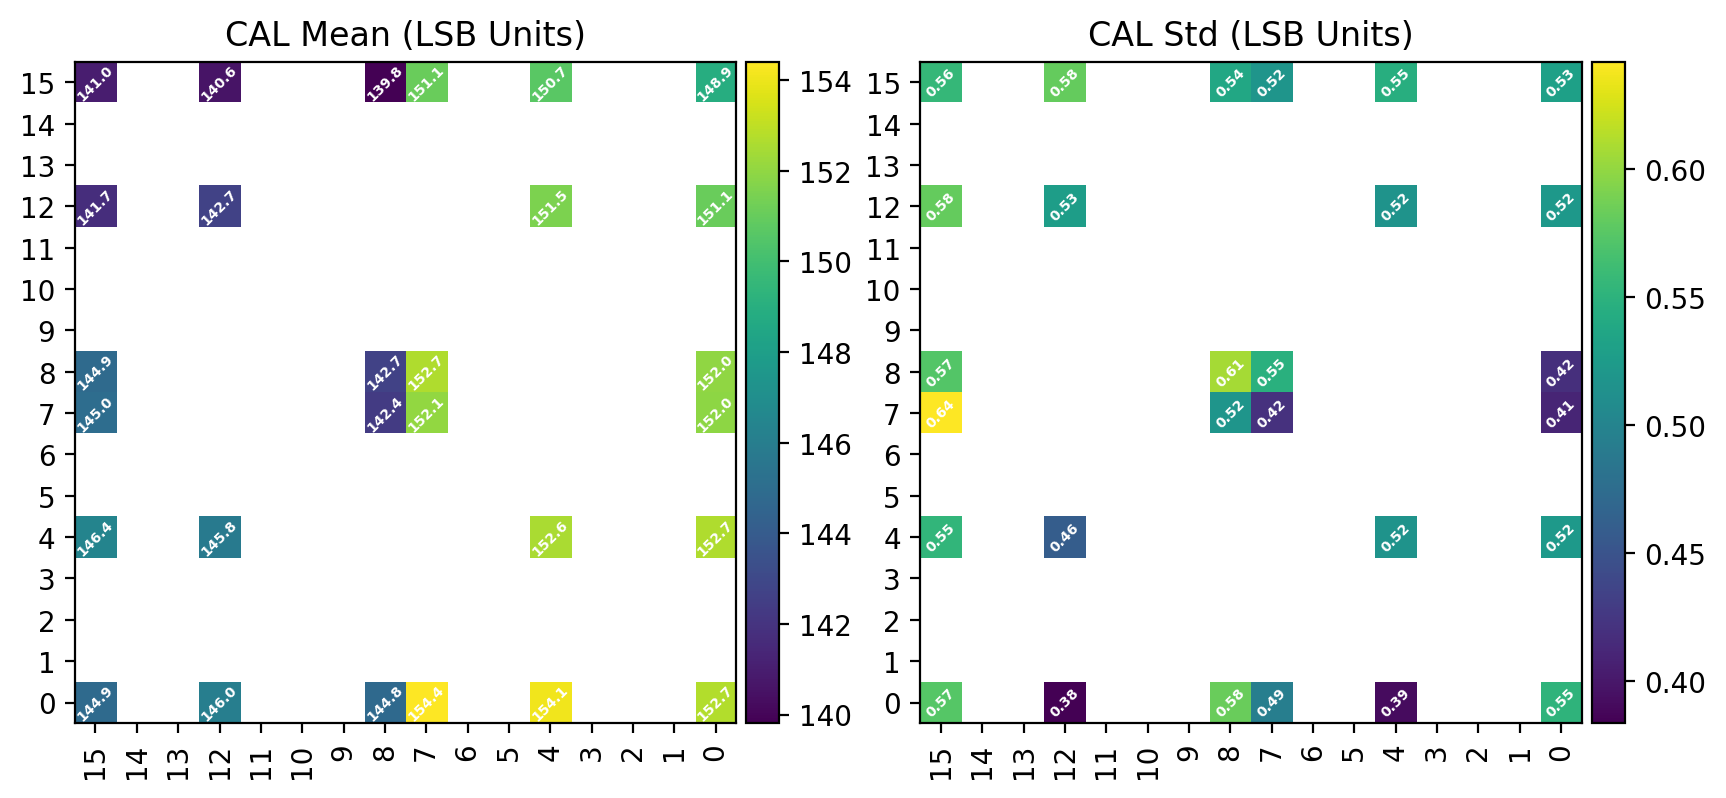

In [239]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("CAL Mean (LSB Units)")
img0 = ax0.imshow(CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("CAL Std (LSB Units)")
img1 = ax1.imshow(CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

plt.savefig("figures/CAL_scan.pdf")
plt.show()

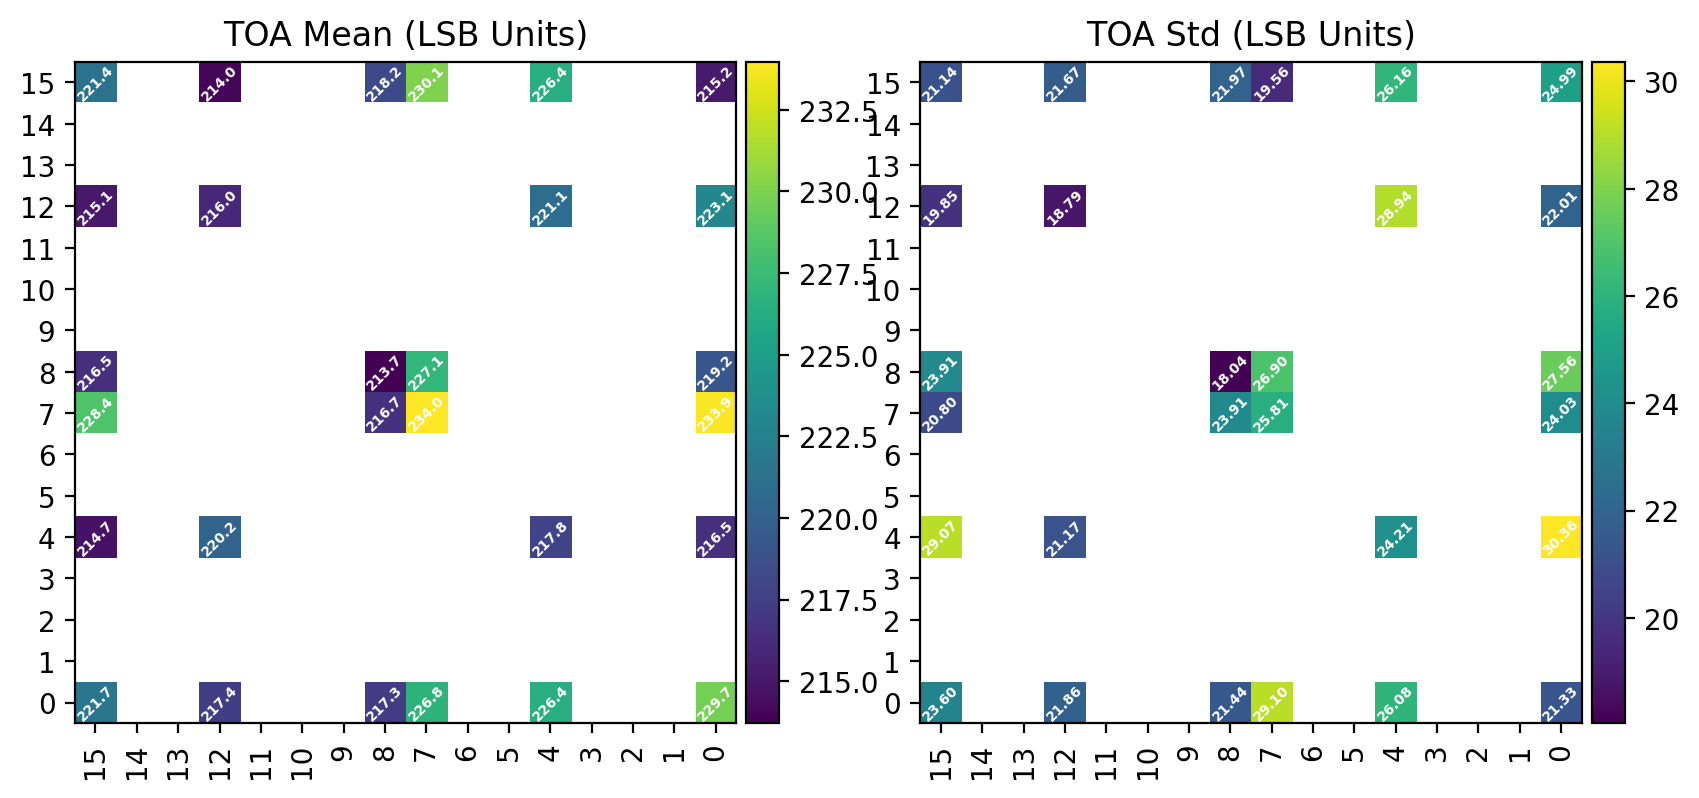

In [240]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOA Mean (LSB Units)")
img0 = ax0.imshow(TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOA Std (LSB Units)")
img1 = ax1.imshow(TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(TOA_mean.T[x,y])): continue
        ax0.text(x, y, f"{TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(TOA_std.T[x,y])): continue
        ax1.text(x, y, f"{TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

plt.savefig("figures/TOA_scan.pdf")
plt.show()

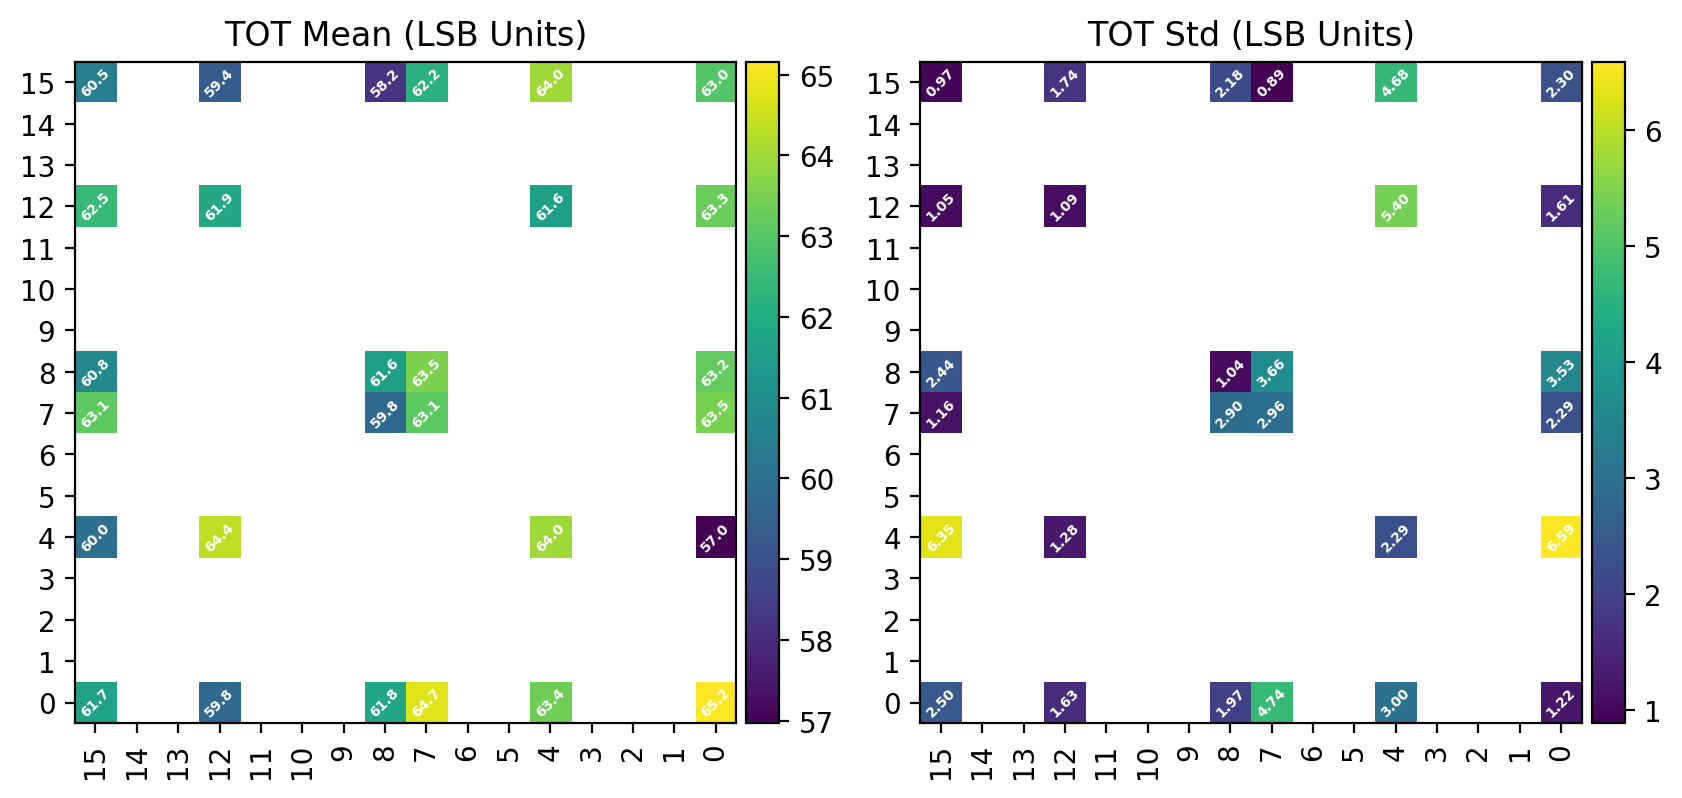

In [241]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOT Mean (LSB Units)")
img0 = ax0.imshow(TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOT Std (LSB Units)")
img1 = ax1.imshow(TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(TOT_mean.T[x,y])): continue
        ax0.text(x, y, f"{TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(TOT_std.T[x,y])): continue
        ax1.text(x, y, f"{TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

plt.savefig("figures/TOT_scan.pdf")
plt.show()

### Hist Distributions

In [123]:
h = [[(
        Hist.new.Integer(125, 165, name="CAL", label="CAL [LSB]")
        .Integer(45, 85, name="TOT", label="TOT [LSB]")
        .Integer(150, 300, name="TOA", label="TOA [LSB]")
        .Double()
      ) if not np.isnan(CAL_mean[i,j]) else np.nan
      for j in range(16)] 
     for i in range(16)]

total_files = len(file_list)
for file_index, file_name in enumerate(file_list):
    print(f"{file_index+1}/{total_files}")
    with open(file_name) as infile:
        for line in infile:
            text_list = line.split()
            if text_list[2]!="DATA": continue
            col = int(text_list[6])
            row = int(text_list[8])
            TOA = int(text_list[10])
            TOT = int(text_list[12])
            CAL = int(text_list[14])
            if not np.isnan(CAL_mean[row,col]): h[row][col].fill(CAL,TOT,TOA)

1/226
2/226
3/226
4/226
5/226
6/226
7/226
8/226
9/226
10/226
11/226
12/226
13/226
14/226
15/226
16/226
17/226
18/226
19/226
20/226
21/226
22/226
23/226
24/226
25/226
26/226
27/226
28/226
29/226
30/226
31/226
32/226
33/226
34/226
35/226
36/226
37/226
38/226
39/226
40/226
41/226
42/226
43/226
44/226
45/226
46/226
47/226
48/226
49/226
50/226
51/226
52/226
53/226
54/226
55/226
56/226
57/226
58/226
59/226
60/226
61/226
62/226
63/226
64/226
65/226
66/226
67/226
68/226
69/226
70/226
71/226
72/226
73/226
74/226
75/226
76/226
77/226
78/226
79/226
80/226
81/226
82/226
83/226
84/226
85/226
86/226
87/226
88/226
89/226
90/226
91/226
92/226
93/226
94/226
95/226
96/226
97/226
98/226
99/226
100/226
101/226
102/226
103/226
104/226
105/226
106/226
107/226
108/226
109/226
110/226
111/226
112/226
113/226
114/226
115/226
116/226
117/226
118/226
119/226
120/226
121/226
122/226
123/226
124/226
125/226
126/226
127/226
128/226
129/226
130/226
131/226
132/226
133/226
134/226
135/226
136/226
137/226
138/226
139/

In [124]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) CAL (LSB)")
        h[i][j].project("CAL").plot1d(ax=ax, histtype="fill")
        h[i][j].project("CAL").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.savefig("figures/CAL_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


In [125]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) TOA (LSB)")
        h[i][j].project("TOA").plot1d(ax=ax, histtype="fill")
        h[i][j].project("TOA").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.savefig("figures/TOA_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


4 13
4 14
4 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


In [163]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) TOT (LSB)")
        h[i][j].project("TOT").plot1d(ax=ax, histtype="fill")
        h[i][j].project("TOT").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.savefig("figures/TOT_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 1
4 2
4 3
4 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


In [220]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        divider = make_axes_locatable(ax)
        top_ax = divider.append_axes('top', size='20%', pad=0.1, sharex=ax)
        side_ax = divider.append_axes('right', size='20%', pad=0.1, sharey=ax)
        h[i][j].project("CAL", "TOT").plot2d_full(
            ax_dict = {"main_ax":ax, "top_ax":top_ax, "side_ax":side_ax},
            main_cmap="coolwarm",
            top_ls="-",top_color="orange",top_lw=2,
            side_ls="-",side_lw=2,side_color="steelblue",
        )
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
        start, end = side_ax.get_xlim()
        side_ax.set_xticks(np.linspace(0, end, 3), np.linspace(0, end, 3), rotation='vertical')
        side_ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
        top_ax.set_title(f"Pixel ({i},{j}) : CAL vs TOT (LSB)")
plt.savefig("figures/CAL_vs_TOT_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 1
8 2
8 3
8 4
8 5
8 6
8 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

In [221]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        divider = make_axes_locatable(ax)
        top_ax = divider.append_axes('top', size='20%', pad=0.1, sharex=ax)
        side_ax = divider.append_axes('right', size='20%', pad=0.1, sharey=ax)
        h[i][j].project("TOA", "TOT").plot2d_full(
            ax_dict = {"main_ax":ax, "top_ax":top_ax, "side_ax":side_ax},
            main_cmap="coolwarm",
            top_ls="-",top_color="orange",top_lw=2,
            side_ls="-",side_lw=2,side_color="steelblue",
        )
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
        start, end = side_ax.get_xlim()
        side_ax.set_xticks(np.linspace(0, end, 3), np.linspace(0, end, 3), rotation='vertical')
        side_ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
        top_ax.set_title(f"Pixel ({i},{j}) : TOA vs TOT (LSB)")
plt.savefig("figures/TOA_vs_TOT_chip.pdf")
plt.close()

0 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

0 1
0 2
0 3
0 4
0 5
0 6
0 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

0 8
0 9
0 10
0 11
0 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 9
7 10
7 11
7 12
7 13
7 14
7 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


15 1
15 2
15 3
15 4
15 5
15 6
15 7


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


15 8
15 9
15 10
15 11
15 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

15 13
15 14
15 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


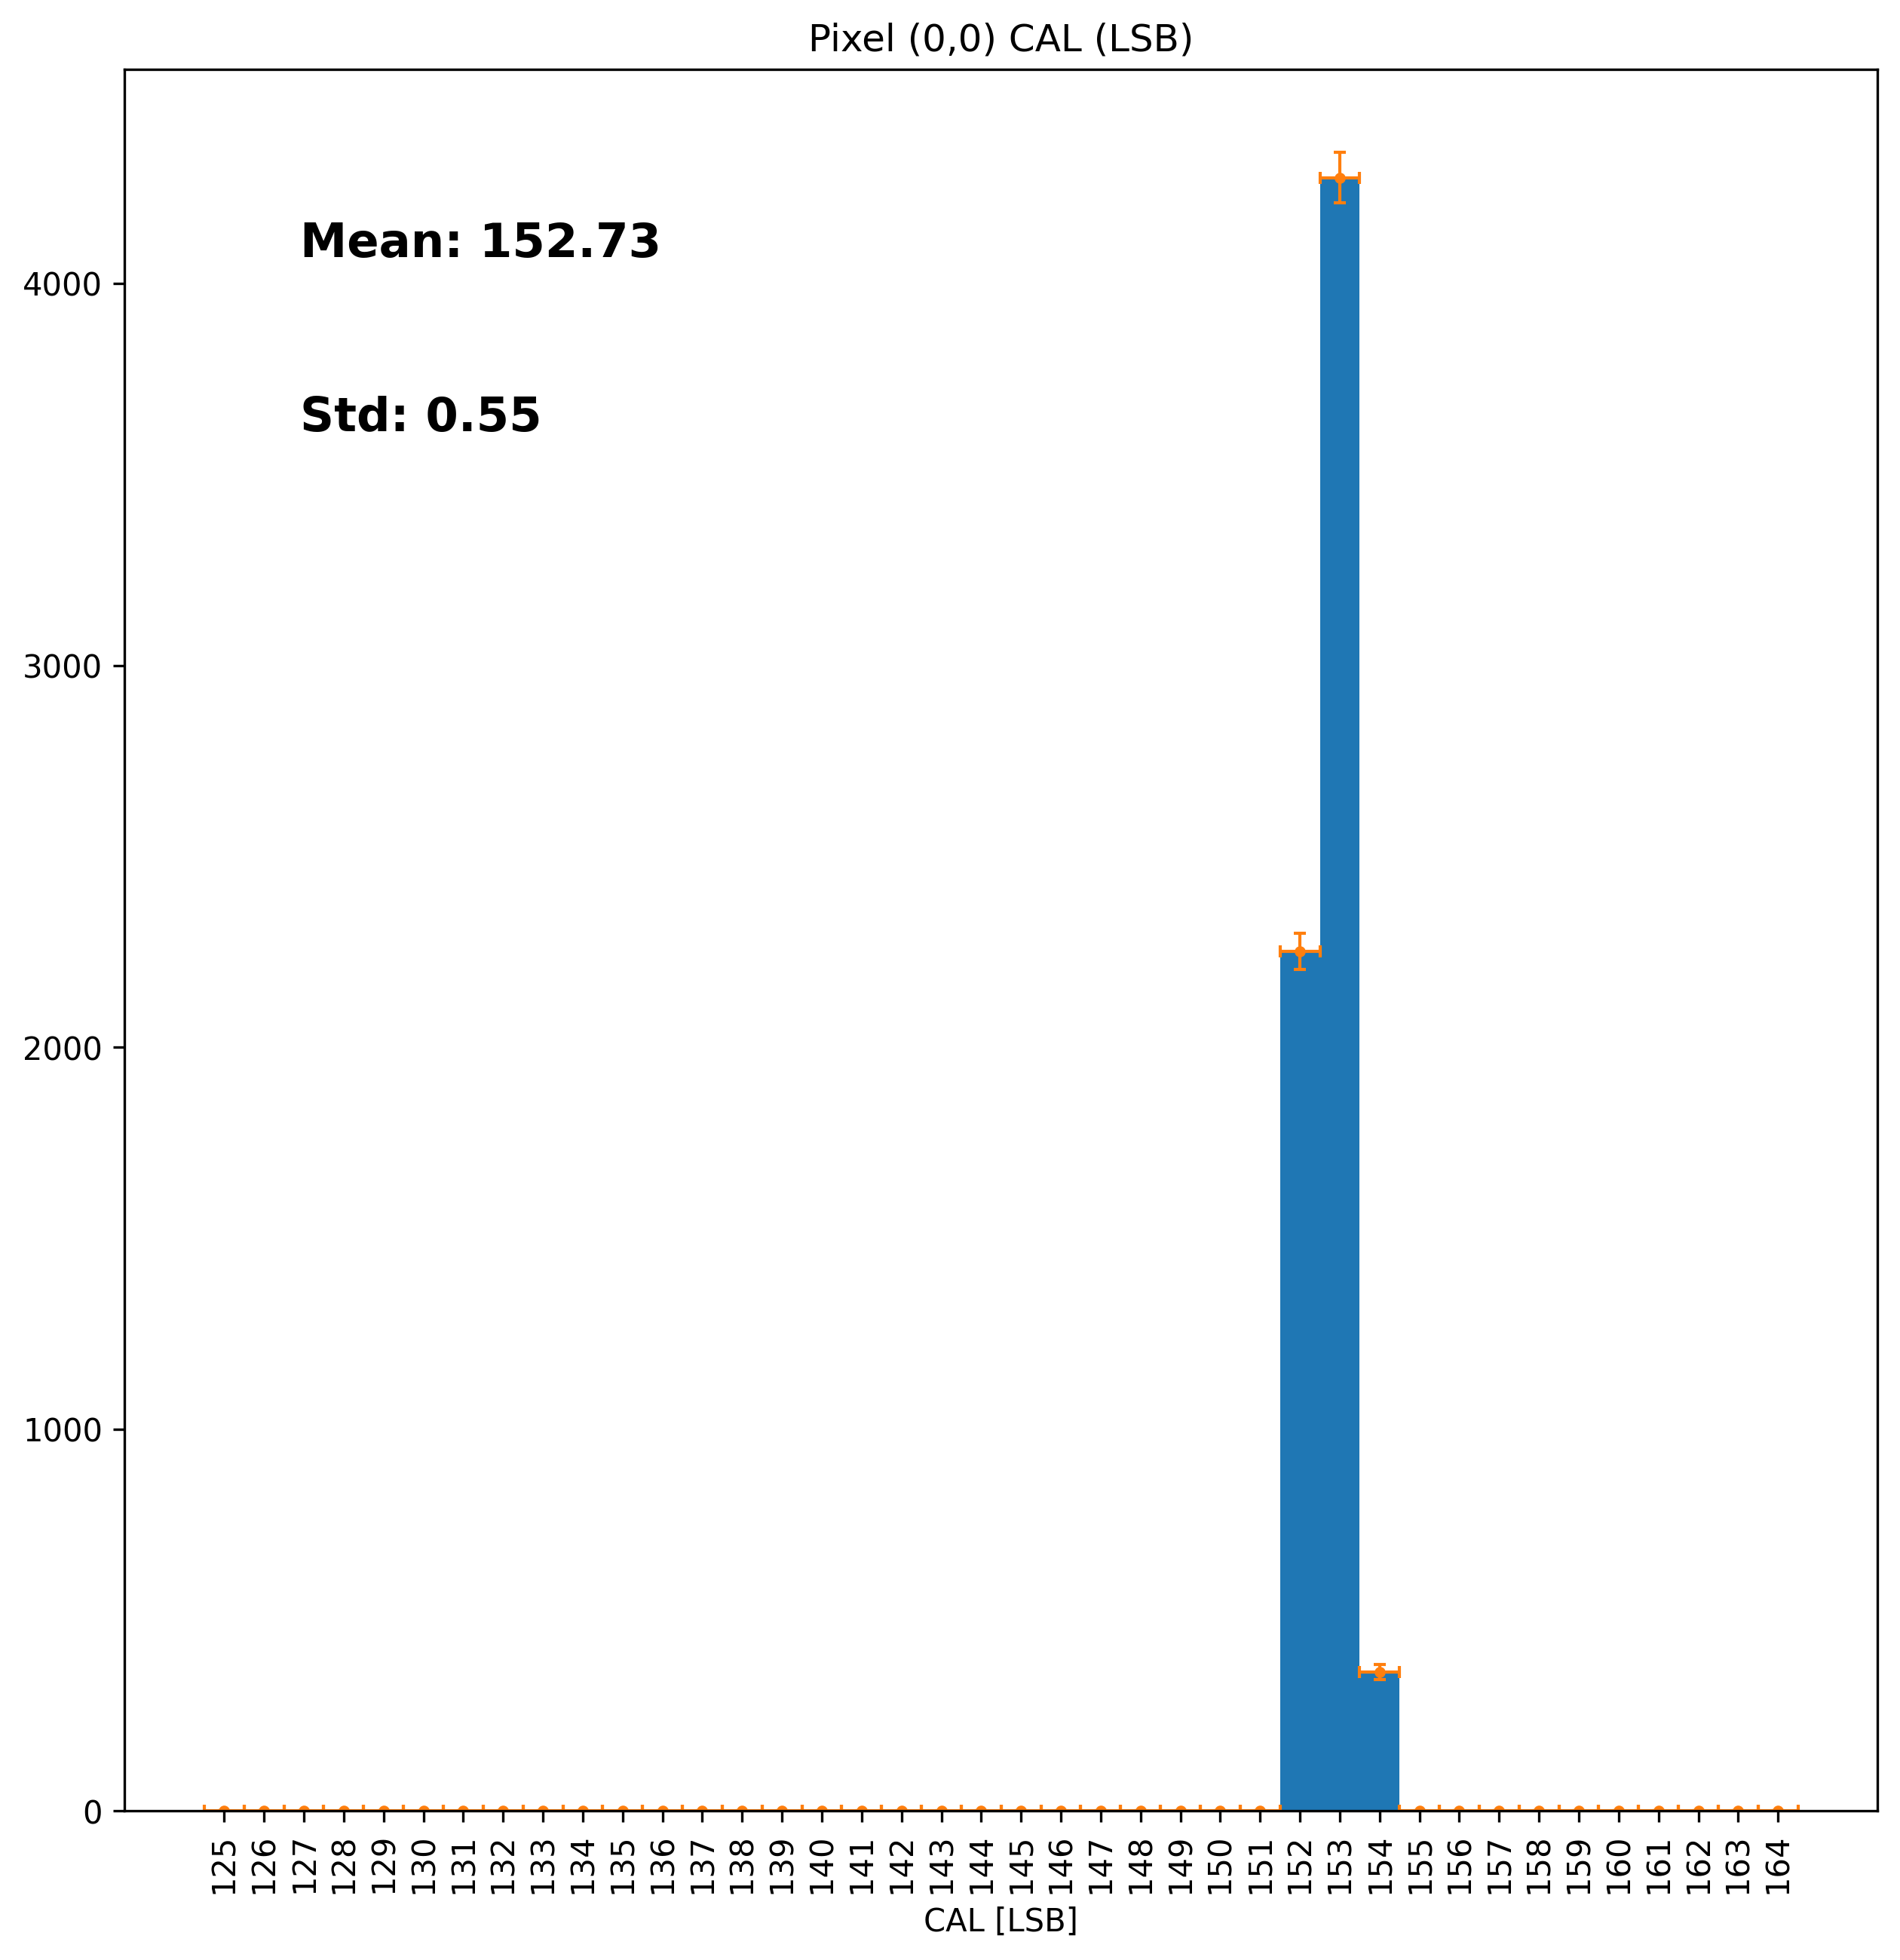

In [235]:
fig = plt.figure(dpi=300, figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Pixel ({0},{0}) CAL (LSB)")
h[0][0].project("CAL").plot1d(ax=ax, lw=1, histtype="fill")
h[0][0].project("CAL").plot1d(ax=ax, lw=1, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
# h[0][0].project("TOA").plot1d(ax=ax, lw=1)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
ax.text(0.1, 0.9, f"Mean: {CAL_mean[0,0]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
ax.text(0.1, 0.8, f"Std: {CAL_std[0,0]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
plt.savefig("figures/CAL_0_0.pdf")
plt.show()

In [222]:
# fig = plt.figure(dpi=75, figsize=(10,10))
# gs = fig.add_gridspec(1,1)
# ax = fig.add_subplot(gs[0,0])

# divider = make_axes_locatable(ax)
# top_ax = divider.append_axes('top', size='20%', pad=0.1, sharex=ax)
# side_ax = divider.append_axes('right', size='20%', pad=0.1, sharey=ax)

# h[0][0].project("CAL", "TOT").plot2d_full(
#     ax_dict = {"main_ax":ax, "top_ax":top_ax, "side_ax":side_ax},
#     main_cmap="coolwarm",
#     top_ls="-",
#     top_color="orange",
#     top_lw=2,
#     side_ls="-",
#     side_lw=2,
#     side_color="steelblue",
# )

# ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
# start, end = side_ax.get_xlim()
# side_ax.set_xticks(np.linspace(0, end, 3), np.linspace(0, end, 3), rotation='vertical')
# side_ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
# top_ax.set_title(f"Pixel ({0},{0}) : CAL vs TOT (LSB)")
# plt.show()

In [136]:
h[0][0].project("TOT")

Hist(Integer(45, 85, name='TOT', label='TOT [LSB]'), storage=Double()) # Sum: 6892.0

In [140]:
h[0][0].project("CAL", "TOT")

Hist(
  Integer(125, 165, name='CAL', label='CAL [LSB]'),
  Integer(45, 85, name='TOT', label='TOT [LSB]'),
  storage=Double()) # Sum: 6892.0